In [9]:
import time
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt

In [10]:
dataset = pd.read_csv('/Users/SirishaBojjireddy/Documents/Desktop/courses/ML/assignments/extracredit/Sales_Transactions_Dataset_Weekly.csv')

In [5]:
dataset

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
807,P816,0,1,0,0,1,2,2,6,0,...,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
808,P817,1,0,0,0,1,1,2,1,1,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75
809,P818,0,0,0,1,0,0,0,0,1,...,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.00


In [6]:
dataset.shape

(811, 107)

In [13]:
dataset['Product_Code']

0        P1
1        P2
2        P3
3        P4
4        P5
       ... 
806    P815
807    P816
808    P817
809    P818
810    P819
Name: Product_Code, Length: 811, dtype: object

In [18]:
indexedDataset=dataset.set_index(['Product_Code'])

In [19]:
indexedDataset

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
Product_Code,,,,,,,,,,,,,,,,,,,,,
P1,11,12,10,8,13,12,14,21,6,14,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
P2,7,6,3,2,7,1,6,3,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
P3,7,11,8,9,10,8,7,13,12,6,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
P4,12,8,13,5,9,6,9,13,13,11,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
P5,8,5,13,11,6,7,9,14,9,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P815,0,0,1,0,0,2,1,0,0,1,...,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
P816,0,1,0,0,1,2,2,6,0,1,...,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
P817,1,0,0,0,1,1,2,1,1,0,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75


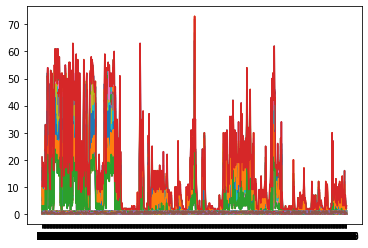

In [20]:
plt.plot(indexedDataset)

In [24]:
dataset['Product_Code']

0        P1
1        P2
2        P3
3        P4
4        P5
       ... 
806    P815
807    P816
808    P817
809    P818
810    P819
Name: Product_Code, Length: 811, dtype: object

In [25]:
dataset[,3:]

SyntaxError: invalid syntax (<ipython-input-25-f1c42458e451>, line 1)

In [26]:
train_size = 600
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1),
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

In [27]:
svr

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma=0.1, kernel='rbf', max_iter=-1,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1.0, 10.0, 100.0, 1000.0],
                         'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [31]:
rng = np.random.RandomState(0)
X = 5 * rng.rand(10000, 1)
y = np.sin(X).ravel()

In [32]:
X

array([[2.74406752],
       [3.57594683],
       [3.01381688],
       ...,
       [3.7921476 ],
       [0.11893714],
       [4.0678754 ]])

In [33]:
y

array([ 0.38713765, -0.42082464,  0.12742837, ..., -0.6056281 ,
        0.11865692, -0.79939211])

In [12]:
data=dataset[dataset.columns[55:]]

In [13]:
data

,Normalized 0,Normalized 1,Normalized 2,Normalized 3,Normalized 4,Normalized 5,Normalized 6,Normalized 7,Normalized 8,Normalized 9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,0.44,0.50,0.39,0.28,0.56,0.50,0.61,1.00,0.17,0.61,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,0.70,0.60,0.30,0.20,0.70,0.10,0.60,0.30,0.30,0.30,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,0.36,0.73,0.45,0.55,0.64,0.45,0.36,0.91,0.82,0.27,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,0.59,0.35,0.65,0.18,0.41,0.24,0.41,0.65,0.65,0.53,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,0.33,0.13,0.67,0.53,0.20,0.27,0.40,0.73,0.40,0.40,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0.00,0.00,0.33,0.00,0.00,0.67,0.33,0.00,0.00,0.33,...,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
807,0.00,0.14,0.00,0.00,0.14,0.29,0.29,0.86,0.00,0.14,...,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
808,0.25,0.00,0.00,0.00,0.25,0.25,0.50,0.25,0.25,0.00,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75
809,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.00,0.50,0.00,...,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.00


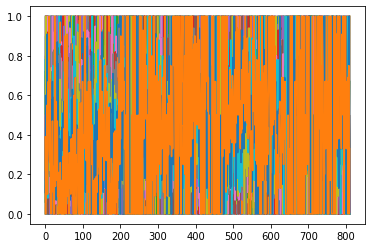

In [52]:
plt.plot(data)

In [20]:
from sklearn.model_selection import train_test_split

In [29]:
y = data['Normalized 51']
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3)

In [66]:
split_point = len(data) - 12
dataset, validation = data[0:split_point], data[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)

Dataset 799, Validation 12


In [35]:
train_size = 790
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1),param_grid={"C": [1e0, 1e1, 1e2, 1e3],"gamma": np.logspace(-2, 2, 5)})

In [31]:
data.shape

(811, 52)

In [33]:
y.shape

(811,)

In [43]:
t0 = time.time()
svr.fit(X_train, y_train)
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"% svr_fit)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


SVR complexity and bandwidth selected and model fitted in 1.019 s


In [39]:
X_train.shape

(567, 52)

In [40]:
X_test.shape

(244, 52)

In [41]:
y_train.shape

(567,)

In [42]:
y_test.shape

(244,)

In [47]:
result=svr.predict(X_test)

In [48]:
result

array([0.89094926, 0.40411825, 0.0986849 , 0.45946796, 0.44523112,
       0.09821289, 0.2211823 , 0.69722161, 0.46042583, 0.88465055,
       0.10083627, 0.59701626, 0.17531084, 0.0989196 , 0.41177146,
       0.46488626, 0.49411403, 0.36894446, 0.50100307, 0.56452453,
       0.9060622 , 0.64155483, 0.9136778 , 0.45192425, 0.09549654,
       0.90061286, 0.89598026, 0.10613536, 0.63875697, 0.88181096,
       0.87948811, 0.47564839, 0.09291779, 0.45488192, 0.09143877,
       0.12766791, 0.64304332, 0.10417149, 0.53529304, 0.13460762,
       0.58368553, 0.09179785, 0.10468271, 0.66357185, 0.42592531,
       0.50056996, 0.51251855, 0.50515096, 0.08960844, 0.40417707,
       0.90281609, 0.48160986, 0.64596178, 0.66480221, 0.88803053,
       0.37595493, 0.09466213, 0.59355798, 0.09826112, 0.35709484,
       0.28724267, 0.47911977, 0.09726113, 0.09804173, 0.66045367,
       0.28974639, 0.91758992, 0.65201641, 0.54478547, 0.30228254,
       0.09063551, 0.08961188, 0.30165484, 0.43718089, 0.37006

In [61]:
import numpy
numpy.savetxt("svr_result.csv", result, delimiter=",")

In [51]:
y_test

340    1.00
392    0.38
762    0.00
9      0.46
404    0.45
       ... 
401    0.67
250    0.00
174    0.00
167    0.00
731    1.00
Name: Normalized 51, Length: 244, dtype: float64

In [60]:
numpy.savetxt("y.csv", y_test, delimiter=",")

In [63]:
y_test.to_numpy()

array([1.  , 0.38, 0.  , 0.46, 0.45, 0.  , 0.14, 0.75, 0.46, 1.  , 0.  ,
       0.62, 0.09, 0.  , 0.41, 0.48, 0.5 , 0.33, 0.5 , 0.62, 1.  , 0.67,
       1.  , 0.44, 0.  , 1.  , 1.  , 0.  , 0.67, 1.  , 0.96, 0.5 , 0.  ,
       0.45, 0.  , 0.03, 0.67, 0.  , 0.56, 0.05, 0.65, 0.  , 0.  , 0.71,
       0.43, 0.5 , 0.54, 0.5 , 0.  , 0.38, 1.  , 0.47, 0.69, 0.69, 1.  ,
       0.36, 0.  , 0.62, 0.  , 0.33, 0.24, 0.45, 0.  , 0.  , 0.7 , 0.25,
       1.  , 0.73, 0.57, 0.25, 0.  , 0.  , 0.25, 0.43, 0.33, 0.33, 0.  ,
       0.25, 0.83, 1.  , 0.  , 0.8 , 0.16, 0.13, 0.  , 0.17, 0.  , 0.62,
       0.77, 0.  , 0.  , 1.  , 0.67, 0.3 , 0.05, 0.  , 0.29, 0.  , 0.  ,
       0.62, 0.67, 0.5 , 0.71, 0.3 , 0.47, 0.  , 0.8 , 0.25, 0.  , 0.67,
       0.  , 0.67, 0.82, 1.  , 0.  , 0.  , 0.5 , 0.75, 0.  , 0.42, 0.6 ,
       0.5 , 0.38, 0.  , 1.  , 0.  , 0.  , 0.  , 0.67, 0.67, 1.  , 0.  ,
       0.56, 0.78, 0.33, 0.23, 1.  , 1.  , 0.85, 1.  , 0.83, 0.27, 0.67,
       0.6 , 0.  , 0.52, 0.67, 0.69, 0.29, 0.16, 0.

In [74]:
sum = 0
for i,j in zip(result, y_test):
    sum+= (i-j)**2
    
sum = sum/len(y_test)
print(sum)

0.005104817525199341


In [77]:
temp = zip(result, y_test)
df=[i for i in temp]

In [78]:
df

[(0.8909492570000004, 1.0),
 (0.40411825498374315, 0.38),
 (0.09868490350075981, 0.0),
 (0.4594679632277507, 0.46),
 (0.4452311167099076, 0.45),
 (0.09821289292259466, 0.0),
 (0.22118229719549526, 0.14),
 (0.6972216146707488, 0.75),
 (0.4604258287187671, 0.46),
 (0.8846505513974237, 1.0),
 (0.1008362675546211, 0.0),
 (0.5970162591330448, 0.62),
 (0.17531083690710675, 0.09),
 (0.0989196002681767, 0.0),
 (0.41177145522114983, 0.41),
 (0.4648862616222988, 0.48),
 (0.4941140349765644, 0.5),
 (0.3689444600155048, 0.33),
 (0.5010030665496439, 0.5),
 (0.5645245292507057, 0.62),
 (0.9060622010042856, 1.0),
 (0.6415548320464108, 0.67),
 (0.9136778024321728, 1.0),
 (0.45192425117104035, 0.44),
 (0.09549653589016033, 0.0),
 (0.9006128562268119, 1.0),
 (0.8959802604743969, 1.0),
 (0.10613536196715562, 0.0),
 (0.6387569668766933, 0.67),
 (0.8818109586843252, 1.0),
 (0.8794881100618652, 0.96),
 (0.47564838804253756, 0.5),
 (0.09291779213768009, 0.0),
 (0.4548819153418408, 0.45),
 (0.0914387739041649

In [79]:
numpy.savetxt("mse.csv", df, delimiter=",")